# Import essential Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
df=pd.read_csv("Sales Data.csv")#Reading Data from dataset to dataframe

In [3]:
df.shape # Know about rows and colums of dataframe

(185950, 11)

In [4]:
df.columns  #know list of columns present in the table 

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,185950.0,8340.388475,5450.554093,0.00,3894.00,7786.00,11872.00,25116.0
Order ID,185950.0,230417.569379,51512.737110,141234.00,185831.25,230367.50,275035.75,319670.0
Quantity Ordered,185950.0,1.124383,0.442793,1.00,1.00,1.00,1.00,9.0
Price Each,185950.0,184.399735,332.731330,2.99,11.95,14.95,150.00,1700.0
Month,185950.0,7.059140,3.502996,1.00,4.00,7.00,10.00,12.0
Sales,185950.0,185.490917,332.919771,2.99,11.95,14.95,150.00,3400.0
Hour,185950.0,14.413305,5.423416,0.00,11.00,15.00,19.00,23.0


In [7]:
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
df.count()

Unnamed: 0          185950
Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
Sales               185950
City                185950
Hour                185950
dtype: int64

In [9]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [10]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


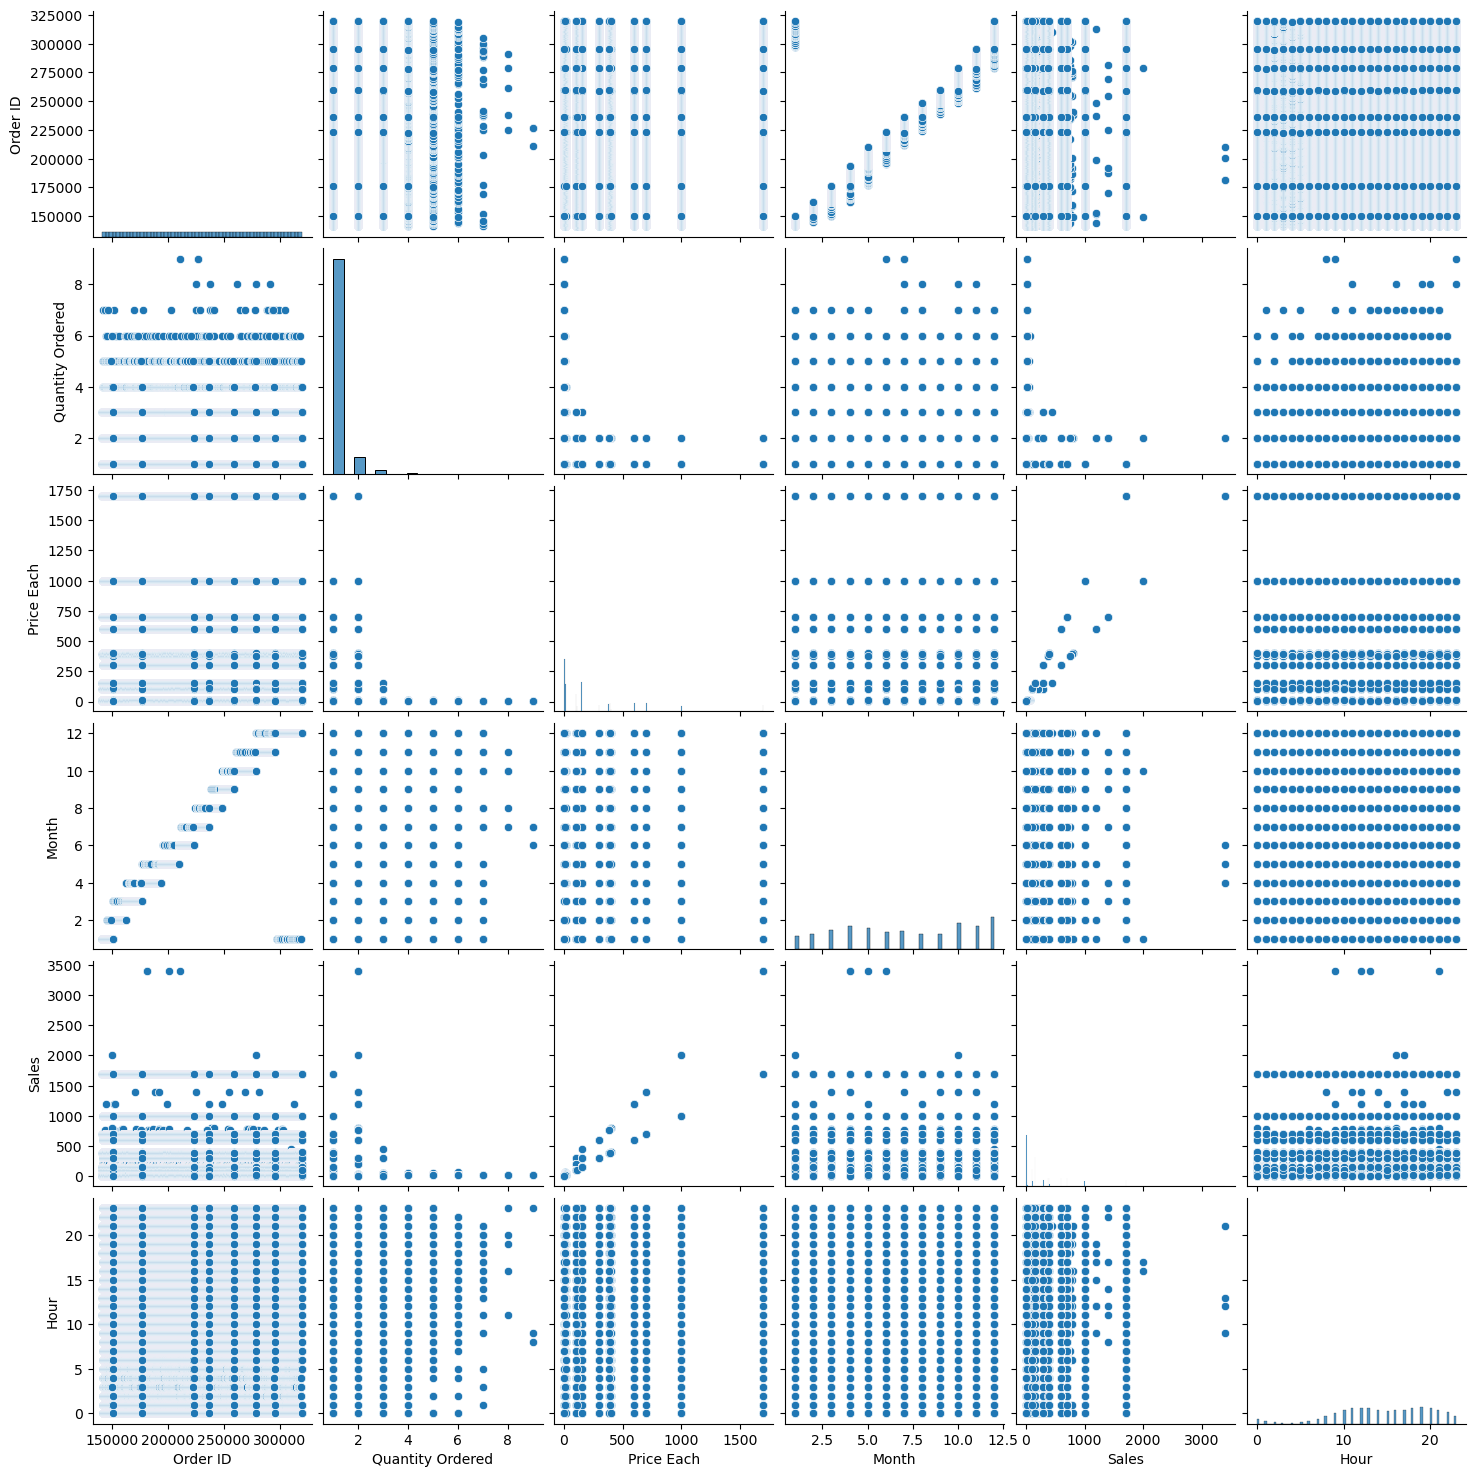

In [11]:
sns.pairplot(data=df)

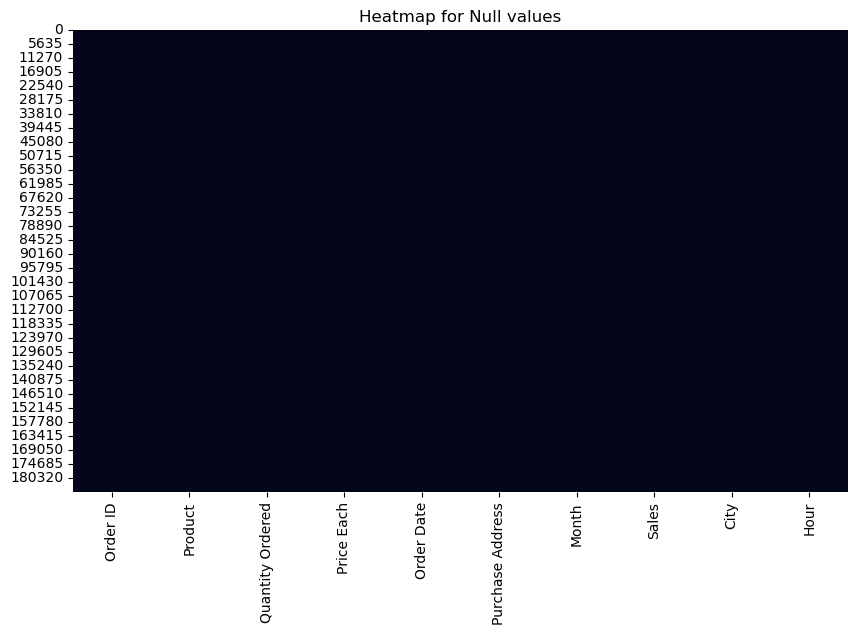

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False)
plt.title('Heatmap for Null values')
plt.show()

In [13]:
df.duplicated().sum()

264

In [14]:
df_cleaned = df[df.duplicated()]
df_cleaned.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [15]:
# group by all columns except those to be aggregated
columns_to_group_by = ['Product', 'Order Date', 'Purchase Address', 'Month', 'City', 'Hour']


# Aggregae the duplicated rows by summing 'Quantity ordered' and 'sales'
df_aggregated = df.groupby(columns_to_group_by).agg({
    'Quantity Ordered': 'sum',
    'Sales' : 'sum',
    'Price Each' : 'first' # or mean if needed
}).reset_index()

df_aggregated.to_csv('cleaned_dataset.csv', index=False)

print('Duplicates handled and cleaned dataset saved.')

Duplicates handled and cleaned dataset saved.


In [16]:
df["Order Date"]=pd.to_datetime(df["Order Date"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [18]:
df_sample = df.sample(n=1000)  # Adjust the sample size as needed
df_sample.select_dtypes(include=['int64', 'float64'])

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
172230,236514,2,3.84,8,7.68,0
16064,311094,1,11.99,12,11.99,14
167189,231654,1,11.99,7,11.99,7
8632,303940,1,14.95,12,14.95,16
67055,173322,2,3.84,3,7.68,17
...,...,...,...,...,...,...
3351,298872,1,99.99,12,99.99,21
75403,241474,1,300.00,8,300.00,15
139356,143673,1,149.99,1,149.99,10
173213,210709,2,3.84,6,7.68,9


In [19]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

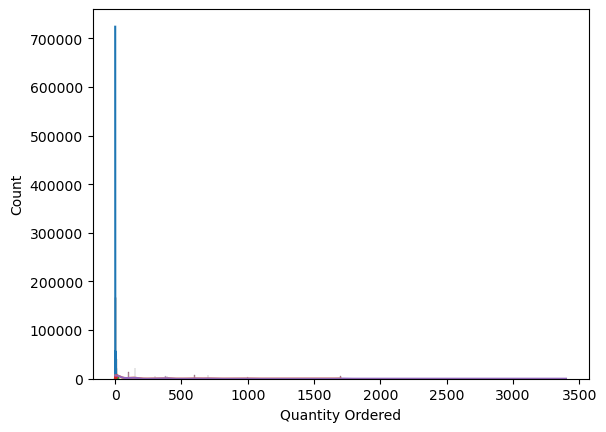

In [20]:
columns=['Quantity Ordered', 'Price Each','Hour', 'Month', 'Sales']

for column in columns:
    sns.histplot(df[column],kde=True)

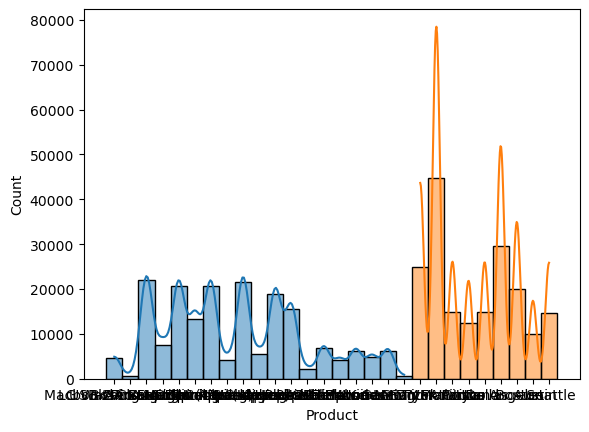

In [21]:
categorical_columns = ['Product', 'City']

for col in categorical_columns:
    sns.histplot(df[col],kde=True)

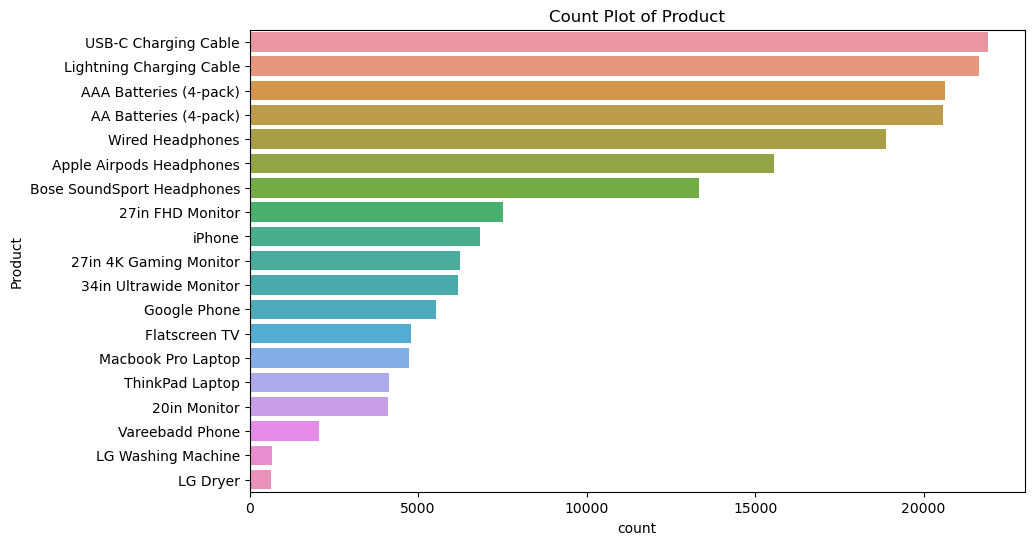

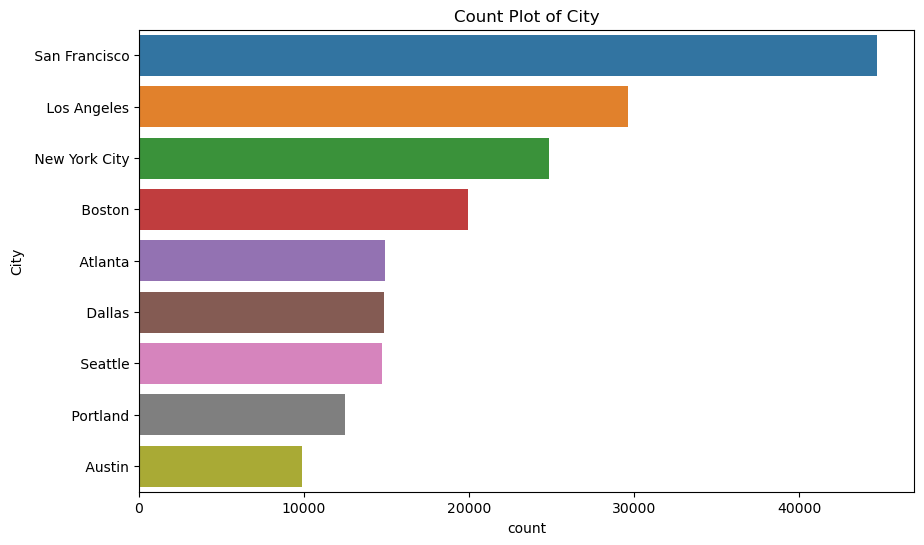

In [22]:
categorical_columns = ['Product', 'City']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

In [23]:
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
Order ID,1.000000,0.000702,-0.002857,0.993063,-0.002949,0.001175
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791,-0.139417,-0.002218
Price Each,-0.002857,-0.148272,1.000000,-0.003375,0.999203,0.001721
Month,0.993063,0.000791,-0.003375,1.000000,-0.003466,0.001731
Sales,-0.002949,-0.139417,0.999203,-0.003466,1.000000,0.001668
Hour,0.001175,-0.002218,0.001721,0.001731,0.001668,1.000000


<Axes: >

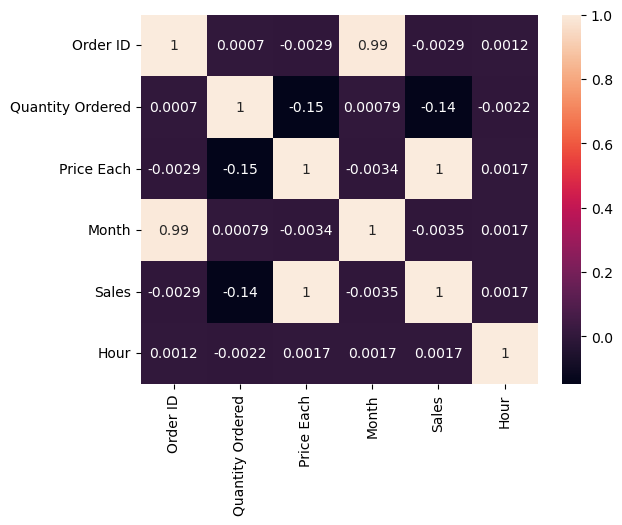

In [24]:
sns.heatmap(corr_matrix,annot=True)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


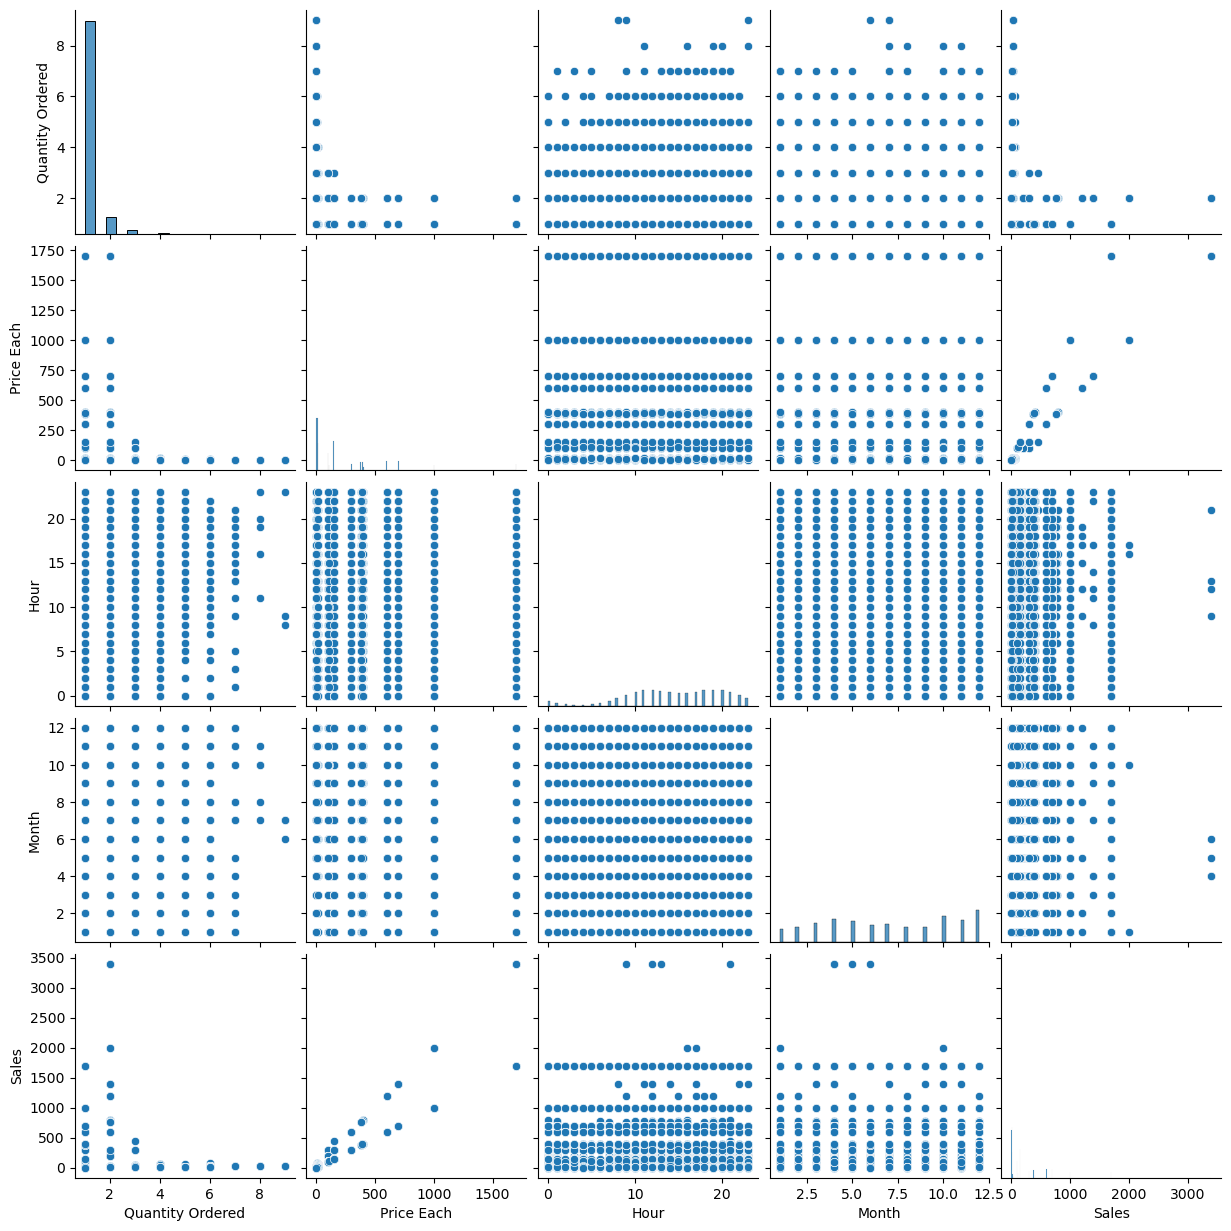

In [25]:
sns.pairplot(df[columns])

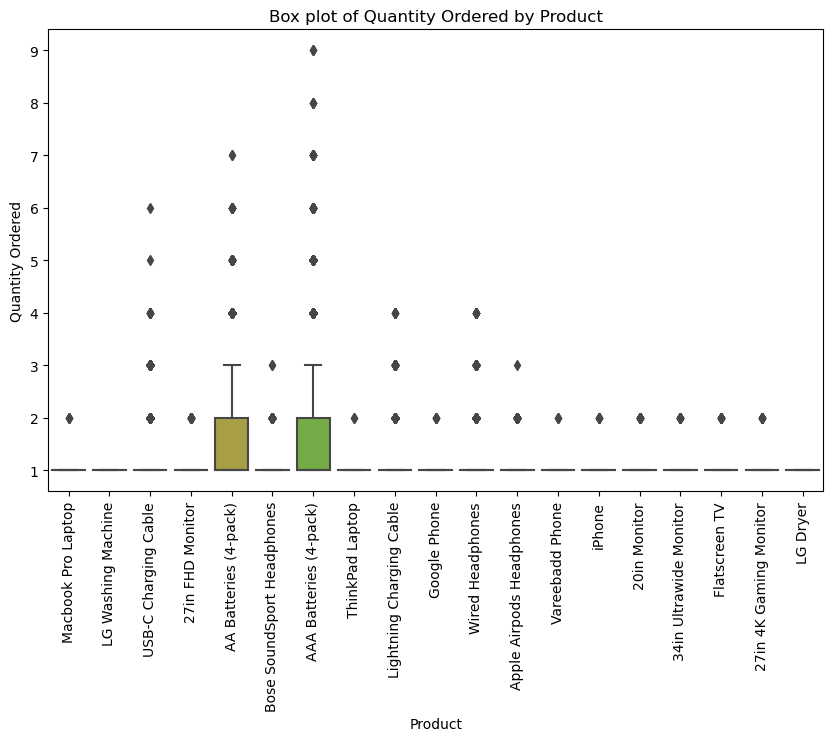

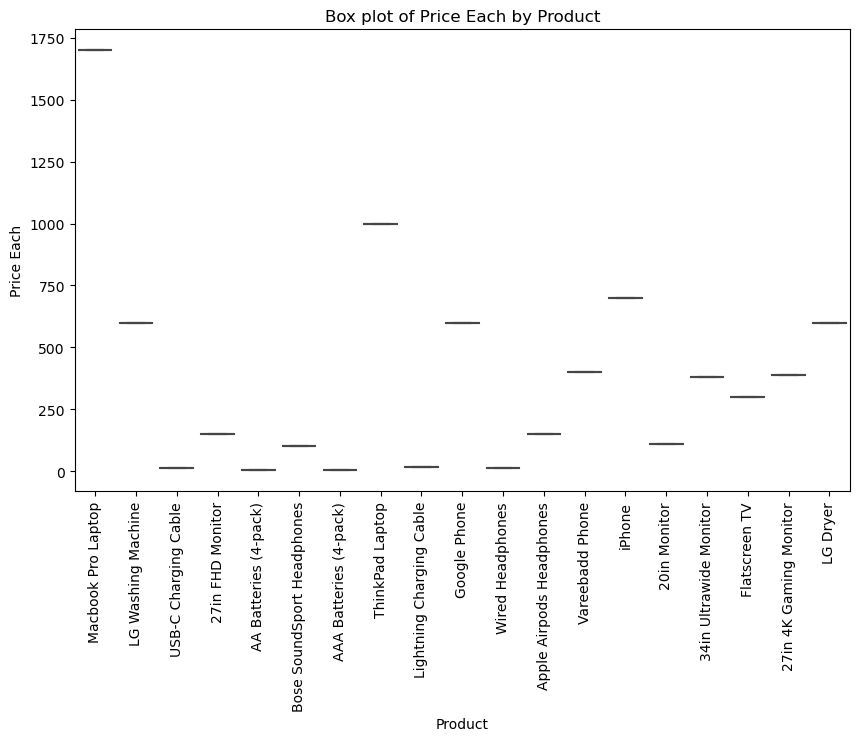

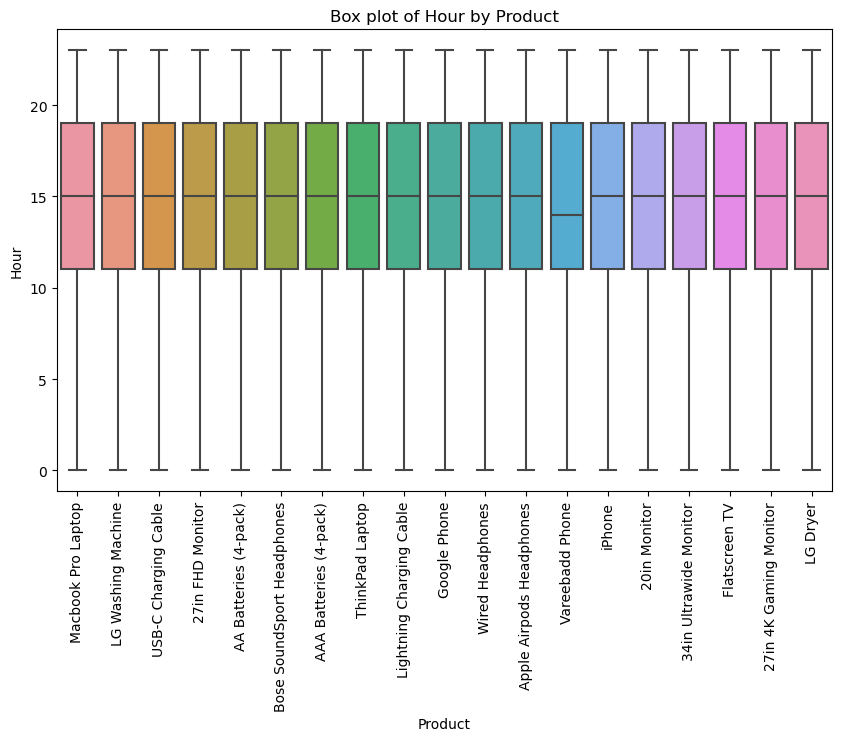

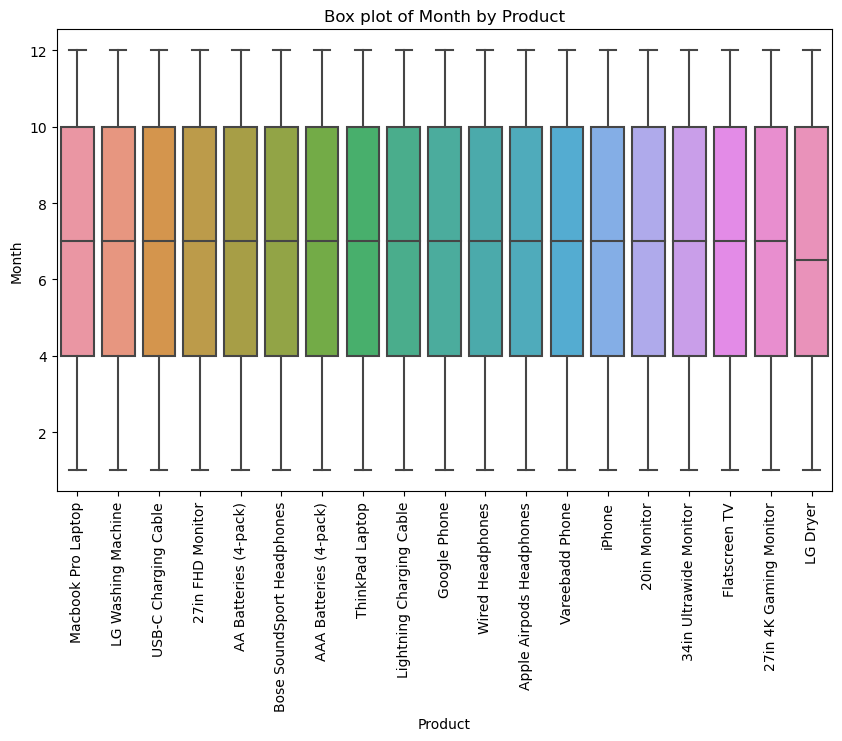

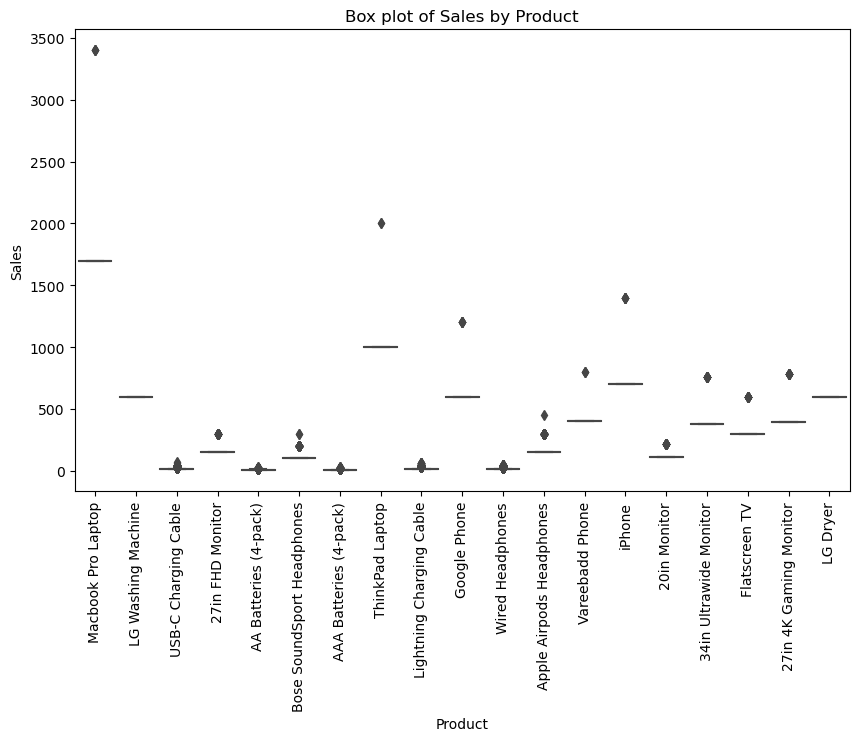

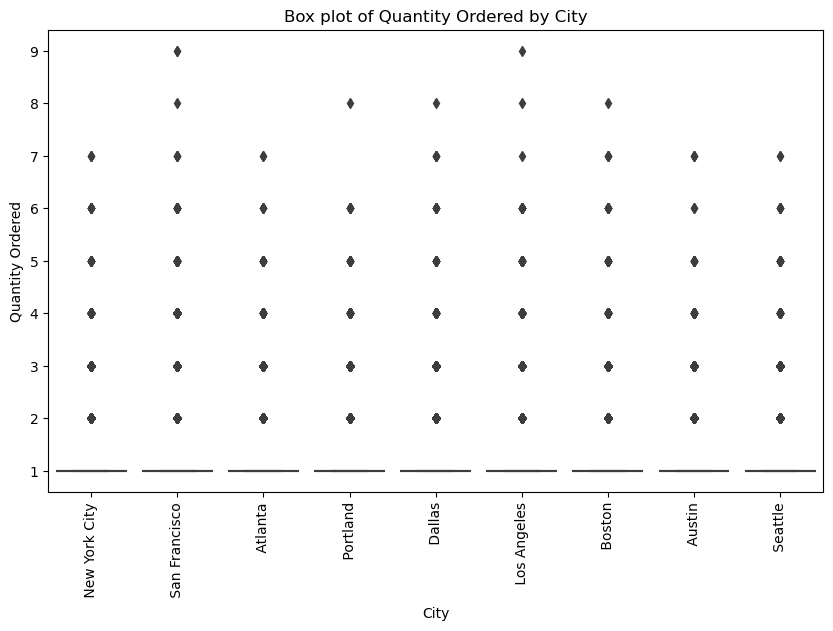

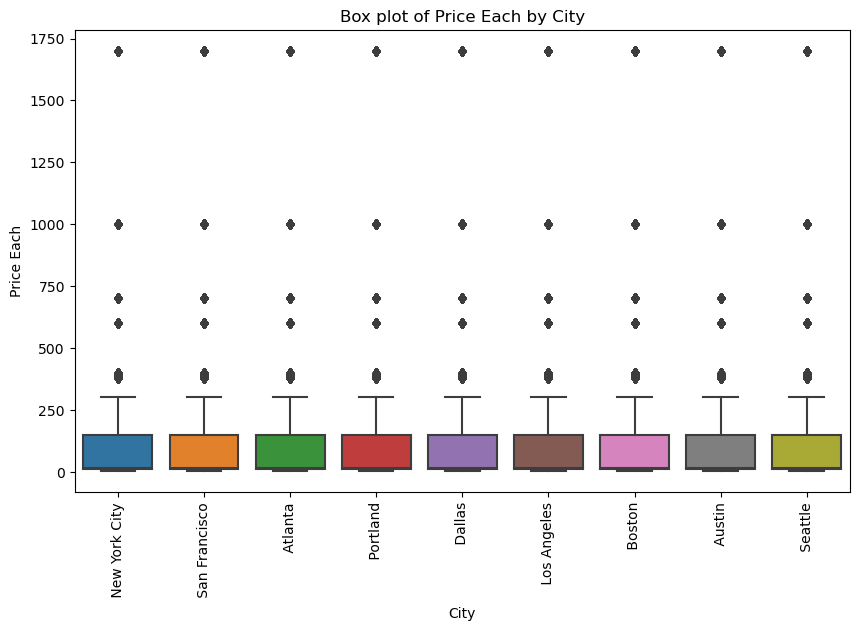

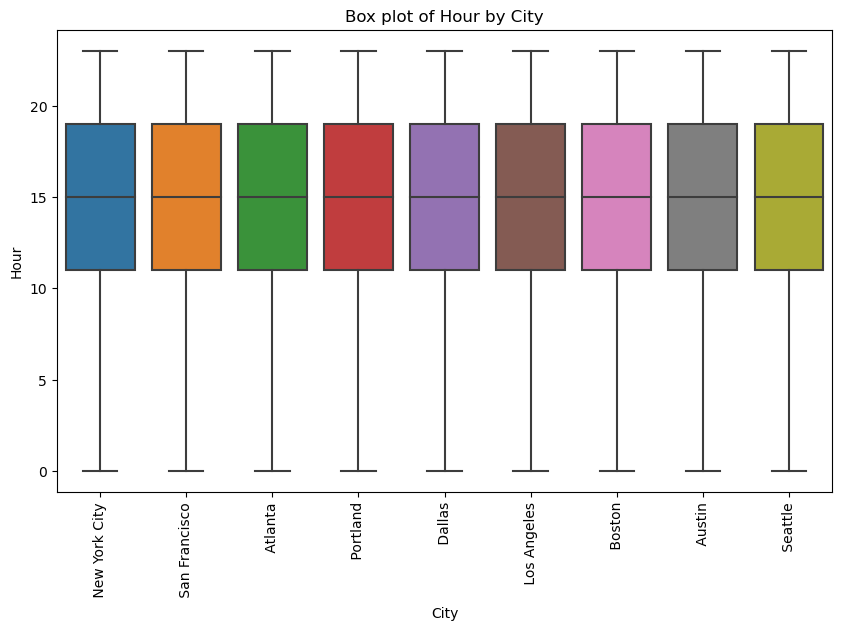

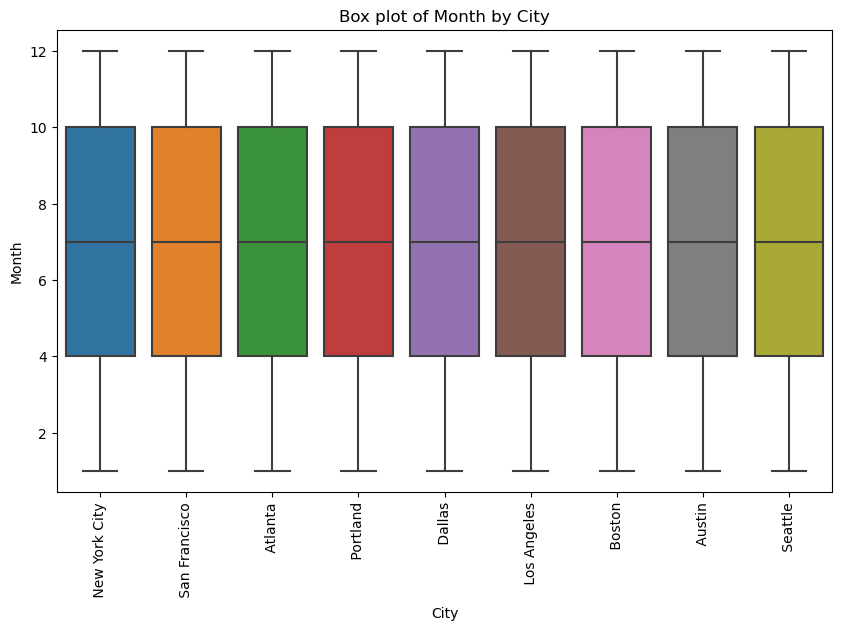

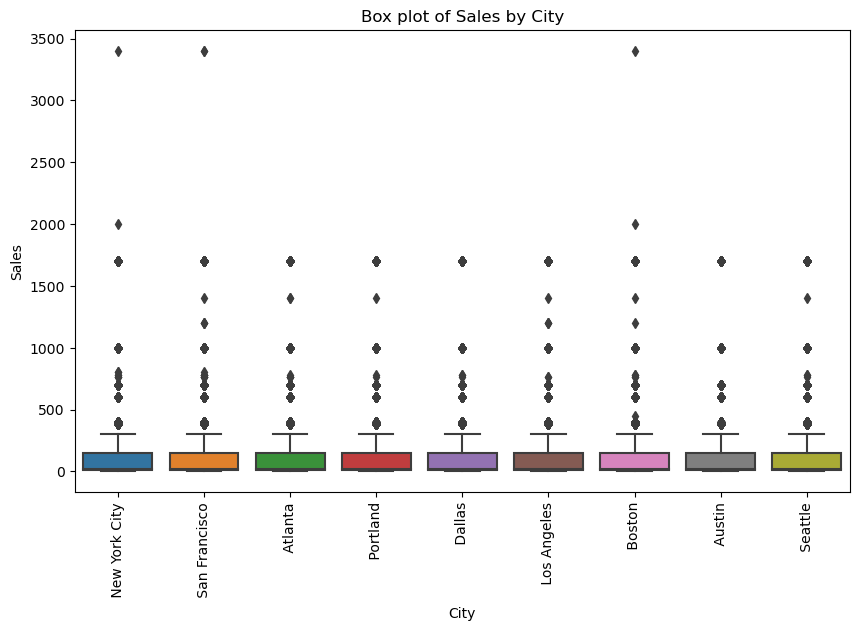

In [26]:
# Box plots for numerical vs categorical columns
for cat_column in categorical_columns:
    for num_column in columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_column, y=num_column, data=df)
        plt.title(f'Box plot of {num_column} by {cat_column}')
        plt.xticks(rotation=90)
        plt.show()

In [27]:
df_sample.select_dtypes(include=['object']).head(3)

,Product,Purchase Address,City
172230,AA Batteries (4-pack),"820 Highland St, New York City, NY 10001",New York City
16064,Wired Headphones,"776 12th St, San Francisco, CA 94016",San Francisco
167189,Wired Headphones,"779 Forest St, Atlanta, GA 30301",Atlanta


In [28]:
unique_products = df['Product'].nunique()
unique_cities = df['City'].nunique()

In [29]:
# If there are too many unique values, filter to a manageable subset
if unique_products > 10:
    products_to_plot = df['Product'].value_counts().index[:10]
    df = df[df['Product'].isin(products_to_plot)]

if unique_cities > 5:
    cities_to_plot = df['City'].value_counts().index[:5]
    df = df[df['City'].isin(cities_to_plot)]

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


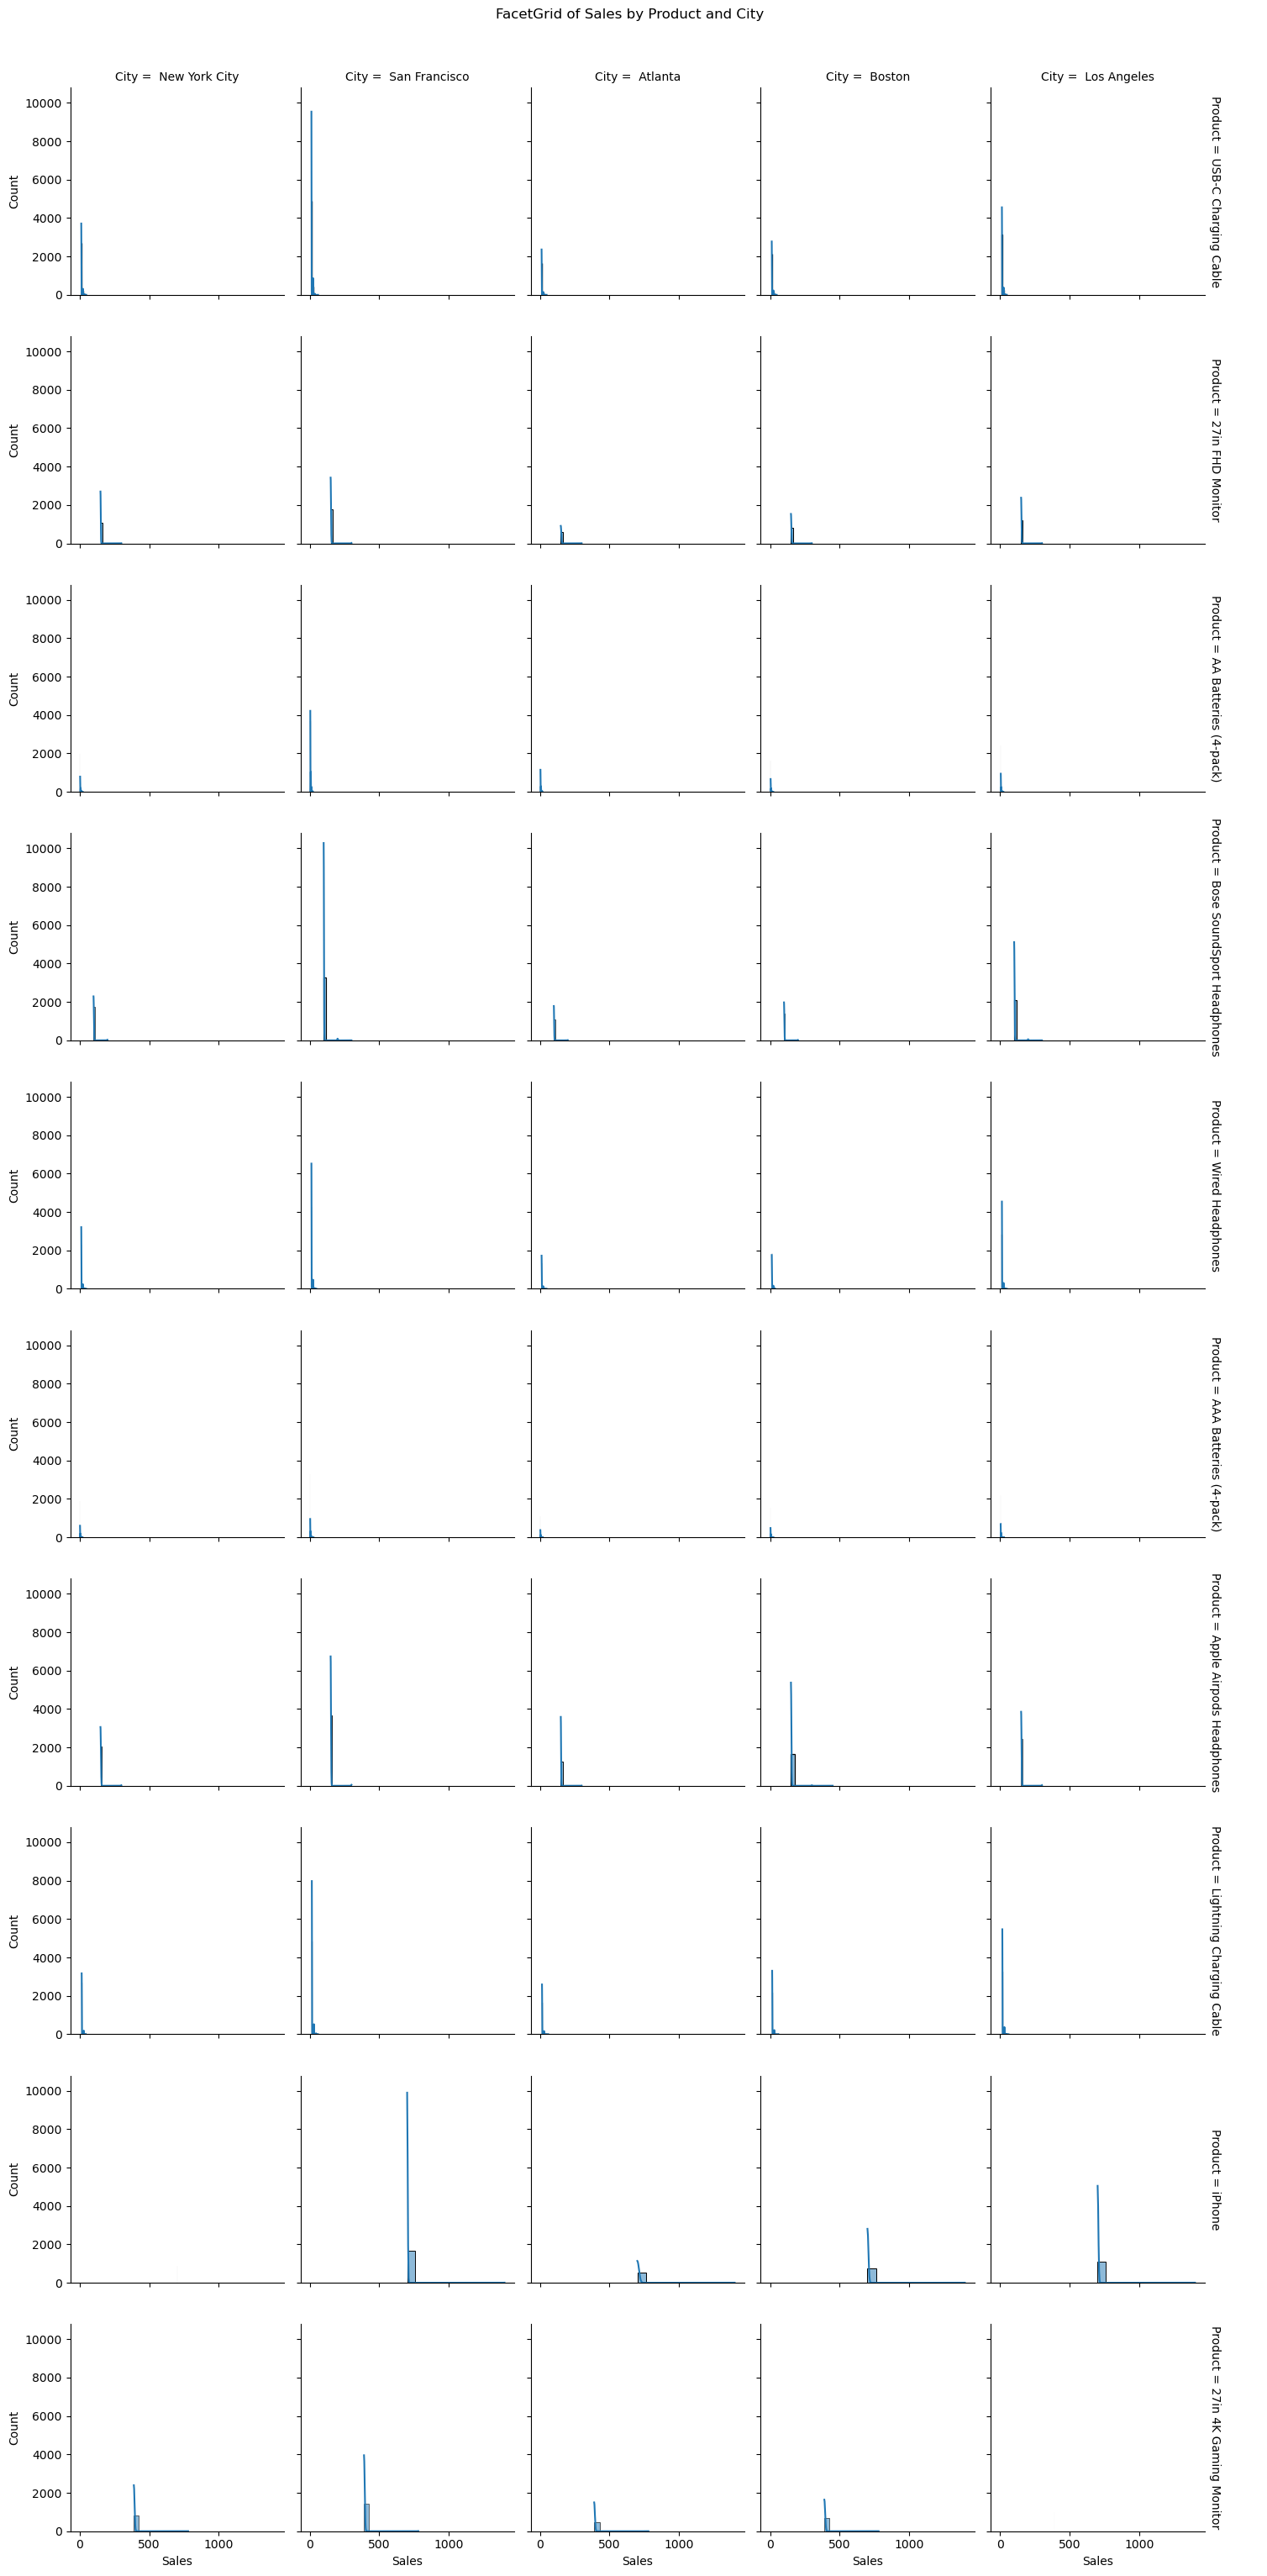

In [30]:
# Create the FacetGrid
g = sns.FacetGrid(df, col='City', row='Product', margin_titles=True, height=3)
g.map_dataframe(sns.histplot, 'Sales', kde=True)
g.add_legend()
plt.suptitle('FacetGrid of Sales by Product and City', y=1.02)
plt.show()

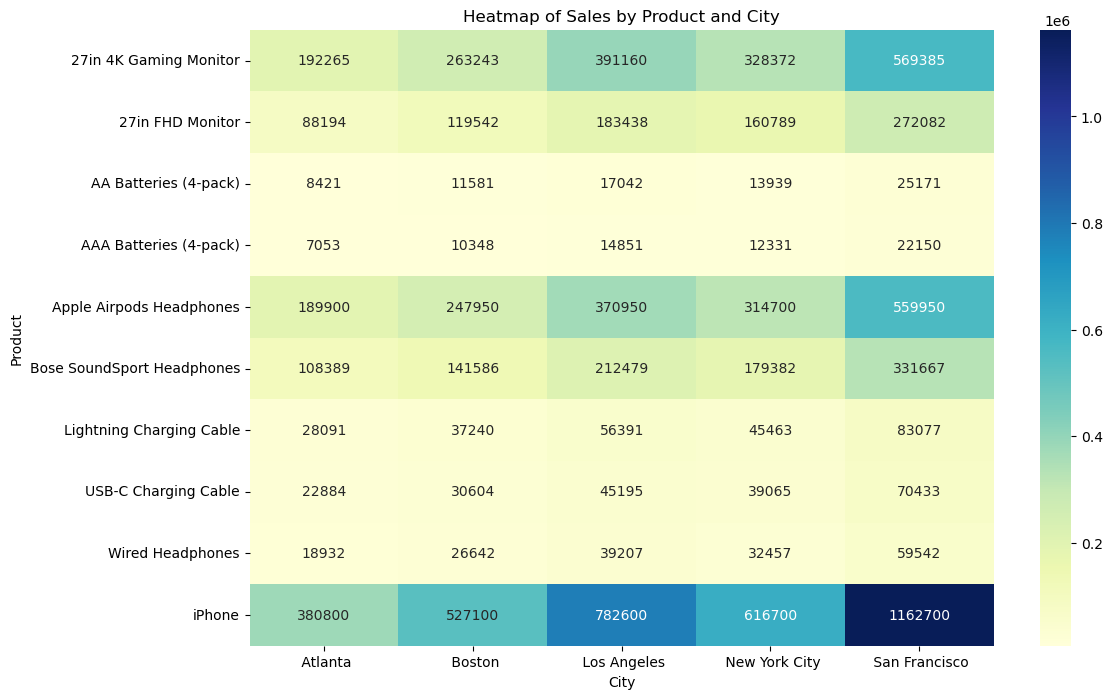

In [31]:
# heatmpa for interaction between multiple features
pivot_table = df.pivot_table(values= 'Sales', index='Product', columns='City', aggfunc = 'sum')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Product and City')
plt.show()